In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

print ("Tensoflow version {}".format(tf.__version__))

/Users/noah/venv_study/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Tensoflow version 1.4.0


In [2]:
# mnist data 내려받기
mnist = input_data.read_data_sets('mnist_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Train image와 label을 값으로 확인
def print_np(x):
    print ('shape : {}'.format(x.shape,))
    print ('values look like \n {}'.format(x))

print_np(mnist.train.images)
print_np(mnist.train.labels)

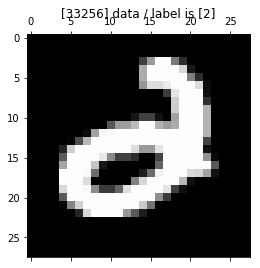

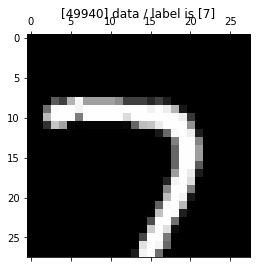

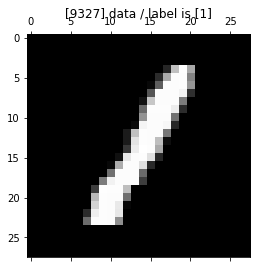

In [6]:
# 임의의 3개 데이터를 그려본다
ntrain = mnist.train.images.shape[0]
nsample = 3
randidx = np.random.randint(ntrain, size=nsample)
for i in randidx:
    imgvec = mnist.train.images[i, :]
    labelvec = mnist.train.labels[i, :]
    img = np.reshape(imgvec, (28,28))
    label = np.argmax(labelvec)
    plt.matshow(img, cmap=plt.get_cmap('gray'))
    plt.title("[{}] data / label is [{}]".format(i, label))

In [9]:
# Random minibatch 만들기

ntrain = 10
randindices = np.random.permutation(ntrain)
randindices

array([5, 7, 2, 0, 8, 1, 6, 4, 3, 9])

In [13]:
ntrain = 10
nbatch = 4
niter = ntrain // nbatch + 1
for i in range(niter):
    currindices = randindices[i*nbatch: (i+1)*nbatch]
    print ("iter: [{}] , batch index: {}".format(i, currindices))
    
    xbatch = mnist.train.images[currindices, :]
    ybatch = mnist.train.labels[currindices, :]
    print ("   shape of XBATCH: {}".format(xbatch.shape,))
    print ("   shape of YBATCH: {}".format(ybatch.shape,))

iter: [0] , batch index: [5 7 2 0]
   shape of XBATCH: (4, 784)
   shape of YBATCH: (4, 10)
iter: [1] , batch index: [8 1 6 4]
   shape of XBATCH: (4, 784)
   shape of YBATCH: (4, 10)
iter: [2] , batch index: [3 9]
   shape of XBATCH: (2, 784)
   shape of YBATCH: (2, 10)
